In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=7
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me break down the Hamiltonian equation and understand the system step by step.

First, I'll identify the dimension and basis order, which means identifying all the flavors in the system:

1. The Hamiltonian is written as $\HH_{\rm MF} = \sum_{\kk, s} \hat{C}^{\dag}_{\kk s}\HH_{\kk s}\hat{C}^{\phantom{\dag}}_{\kk s} + f(n^{p}, \eta)$

2. Here, $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ suggests that we have a 3-component vector for each spin $s$ and momentum $k$:
   - $\hat{p}^{\dag}_{x\kk s}$: Oxygen px orbital creation operator
   - $\hat{p}^{\dag}_{y\kk s}$: Oxygen py orbital creation operator
   - $\hat{d}^{\dag}_{\kk s}$: Copper d orbital creation operator

3. The basis has spin s as well, so we have a total of 2 spins (↑,↓) × 3 orbitals (px, py, d)

Therefore, the dimension D would be (2, 3), where:
- First dimension (2): represents spin (up/down)
- Second dimension 

In [7]:
print(generated_code['thinking'])

Let me break down the Hamiltonian equation and understand the system step by step.

First, I'll identify the dimension and basis order, which means identifying all the flavors in the system:

1. The Hamiltonian is written as $\HH_{\rm MF} = \sum_{\kk, s} \hat{C}^{\dag}_{\kk s}\HH_{\kk s}\hat{C}^{\phantom{\dag}}_{\kk s} + f(n^{p}, \eta)$

2. Here, $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ suggests that we have a 3-component vector for each spin $s$ and momentum $k$:
   - $\hat{p}^{\dag}_{x\kk s}$: Oxygen px orbital creation operator
   - $\hat{p}^{\dag}_{y\kk s}$: Oxygen py orbital creation operator
   - $\hat{d}^{\dag}_{\kk s}$: Copper d orbital creation operator

3. The basis has spin s as well, so we have a total of 2 spins (↑,↓) × 3 orbitals (px, py, d)

Therefore, the dimension D would be (2, 3), where:
- First dimension (2): represents spin (up/down)
- Second dimension (3): represents orbital (px, py, d)

Now, let's ident

In [8]:
print(generated_code['text'])

# Answer:

1) Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up, down
1: orbital. Order: px, py, d

2) EXP-VAL DEPENDENT TERMS:
- `n^p`: Total density of holes on oxygen sites, calculated as the sum of expectation values for px and py orbitals for both spins.
- `η`: Nematic order parameter, representing the difference in occupation between x and y orbitals.
- `n`: Total hole density, calculated as the sum of all expectation values.
- `μ`: Chemical potential (dependent on n and n^p).

TERMS:
- Δ in diagonal elements for px and py: H[0, 0, k], H[0, 1, k], H[1, 0, k], H[1, 1, k] - NI
- -μ term in all diagonal elements - I (depends on n)
- γ₁(kₓ) = -2tₚₚcos(kₓ/2) connecting px and d: H[0/1, 0, k], H[0/1, 2, k] - NI
- γ₁(k𝒚) = -2tₚₚcos(k𝒚/2) connecting py and d: H[0/1, 1, k], H[0/1, 2, k] - NI
- γ₂(k) = -4tₚₚcos(kₓ/2)cos(k𝒚/2) connecting px and py: H[0/1, 0, k], H[0/1, 1, k] - NI
- Ũₚ(n^p)/4 terms in px and py diagonal elements - I
- ±Ṽₚₚ(η)/4 terms in px and py diagonal element

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """Hartree-Fock Hamiltonian for a three-orbital (px, py, d) model on a square lattice.
  
  This class implements the mean-field Hamiltonian for a model of copper-oxygen planes
  with px, py oxygen orbitals and d copper orbitals, including interactions that can lead
  to nematic ordering.
  
  Args:
    N_shell: Number of shells in reciprocal space.
    parameters: Dictionary containing model parameters.
    filling_factor: Filling factor for the system, default 0.5.
  """
  def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
    self.lattice = 'square'
    self.D = (2, 3)  # (spin, orbital)
    self.basis_order = {'0': 'spin', '1': 'orbital'}
    # Order for each flavor:
    # spin: up, down
    # orbital: px, py, d

    # Occupancy relevant parameters
    self.nu = filling_factor
    self.T = parameters.get('T', 0)  # temperature, default to 0
    self.a

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_7.py


# Code evaluation

In [4]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [5]:
import importlib

In [6]:
module = importlib.import_module(code_path)

In [7]:
import HF

## Task 1: Check k-space

In [8]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

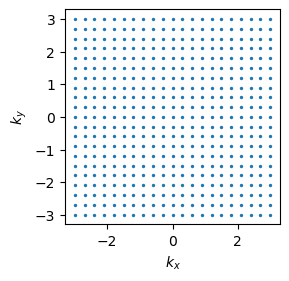

In [9]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [10]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [11]:
h_nonint = ham.generate_non_interacting()

In [12]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

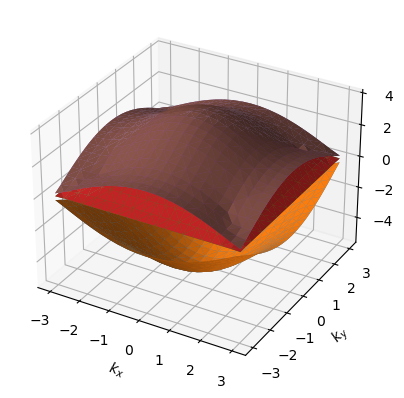

In [13]:
utils_auto.plot_2d_bandstructure(ham,en)

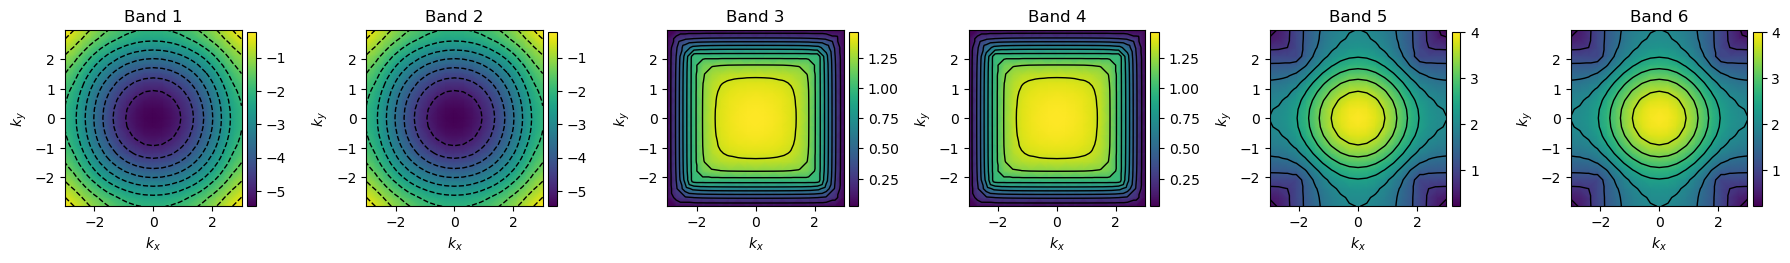

In [14]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [15]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [16]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [17]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 4


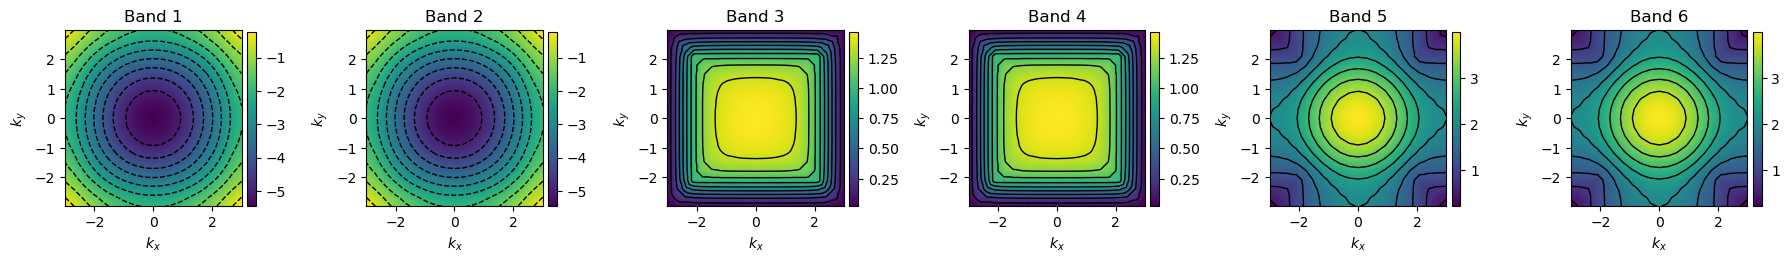

In [18]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [19]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [20]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [21]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 2


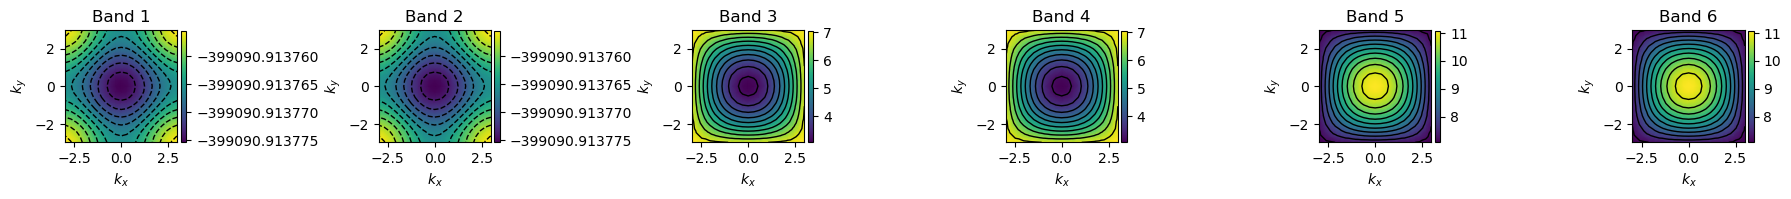

In [22]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [23]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 399093.97
U/T is 23734.56
mean_U is 24190.85


# Auto eval

## Task 1

In [24]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

The image
The image shows a grid of points in the $(k_x, k_y)$ plane, which represents a momentum space mesh in the first Brillouin zone. The Brillouin zone appears to be a square region from approximately -3 to 3 in both the $k_x$ and $k_y$ directions.

Now, I need to examine if this momentum space mesh is appropriate for the given Hamiltonian and check the point group symmetry.

First, let's understand the Hamiltonian structure:
- It's a 3×3 matrix Hamiltonian in momentum space for a three-orbital model (two p-orbitals, one d-orbital)
- The three orbitals are $p_x$, $p_y$, and $d$
- The system has a square lattice structure as specified in the problem

Now, I need to check the point group symmetry:

In a square lattice, the first Brillouin zone should be a square in momentum space, and it should have the same point group symmetry as the lattice, which is the D4 point group (4-fold rotational symmetry plus reflections).

Looking at 

In [25]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [26]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I
I am being asked to analyze a set of false color plots showing the band structure of a condensed matter physics system. The system is described by a Hamiltonian that has been calculated using the Hartree-Fock method. I need to evaluate whether these plots correctly represent the band structure of the system in the first Brillouin zone.

Let me first understand what I'm looking at:
- The image shows 6 panels labeled "Band 1" through "Band 6"
- Each panel shows a false color plot with contour lines 
- The x-axis is labeled k_x and the y-axis is labeled k_y in each plot
- These are plots of the energy bands in momentum (k) space
- The color represents the energy value at each k-point

Now, let me follow the rubric:

1. Identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

Looking at all 6 panels, I can see that the Brillouin zone appears to be square-shaped. The plots show k_x 

In [27]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [28]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu='1/3')
    )


#################### THINKING ####################

I need to evaluate
I need to evaluate if the image in the problem represents the false color plot for the interacting-renormalized band structure in the first Brillouin zone after a self-consistent Hartree-Fock calculation, with infinitesimal interaction.

Let me go through the rubric point by point:

1. Identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

Looking at the image, I can see that all 6 panels show plots where the x and y axes are labeled as k_x and k_y, with values ranging from approximately -3 to 3. The plotting region appears to be square in all cases, which is consistent with the first Brillouin zone of a square lattice. The boundary of the plotted region forms a square, which matches the expected shape for a square lattice.

2. Examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
- I

In [29]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [30]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper, nu='1/3',U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

Let me
Let me go through the given problem and rubric carefully to analyze the band structure plots shown in the image.

The image shows six plots labeled "Band 1" through "Band 6", each showing a false color plot of energy in the first Brillouin zone. These appear to be the results of a Hartree-Fock calculation for the given Hamiltonian.

Let me evaluate each point in the rubric:

1. **Identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.**

Looking at the plots, I can see that each band is plotted in a square region with kx and ky axes ranging from approximately -2.5 to 2.5. This is consistent with the Brillouin zone of a square lattice, which is square-shaped in k-space. So this criterion is met.

2. **Examine the symmetry of the energy distribution:**

2.1 **Identify the highest energy regions (yellow)**:
- In Bands 1-4: The highest energy regions appear to be at the corner

In [31]:
answer4=utils_auto.extract_result_content(result4['text'])

In [32]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '7' saved to final_answer.yaml
